# Iimport libs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
#for plotting distance matrix
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
import sklearn as sk
from sklearn.datasets import load_iris
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# svm imports
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from numpy import genfromtxt
import pandas as pd
import scipy as sc
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn import linear_model
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from scipy.linalg import norm

In [2]:
cd stfow/

/home/martin/Dropbox/wef/stfow


In [3]:
ls

stfow_en.csv
stfow_en_monkey_survey.csv
stfow_en.xlsx
stfow_smonk_googform_en_sp_pt_sep_16.csv
stfow_smonk_googform_en_sp_pt_sep_16_migration_matrix.csv
stfow_smonk_googform_en_sp_pt_sep_16_migration_matrix.xlsx
stfow_smonk_googform_en_sp_pt_sep_16.xlsx


In [4]:
pwd

'/home/martin/Dropbox/wef/stfow'

In [7]:
mold = pd.read_csv('/home/martin/Dropbox/wef/stfow/stfow_smonk_googform_en_sp_pt_sep_16_migration_matrix.csv',sep=';')
#mold = pd.read_csv('/Users/palazzom/Dropbox/wef/stfow/stfow_smonk_googform_en_sp_pt_sep_16_migration_matrix.xlsx', error_bad_lines=False)





In [8]:
mold.head()

,global_id,age_cat,gender,ed_qual,employ_stat,employ_sector,years_bef_tran,Change_10,ten_workshift
0,1,21-29,Male,NaN,Full-time employee,Public service and Government,1 to 2 years,NaN,NaN
1,2,30-39,Male,NaN,Entrepreneur,Non-profit,2 to 5 years,NaN,NaN
2,3,18-20,Male,College,Student and employee,Commerce,2 to 5 years,Yes,NaN
3,4,30 - 39,Male,Secondary School,Entrepreneur,Public service and government,Less than 1 year,No,"Transport (including civil aviation, railways ..."
4,5,18 - 20,Female,Secondary School,Student,NaN,1 toÌ_ 2 years,No,Digital marketing


### Select columns of interest

In [9]:
mold.columns

Index(['global_id', 'age_cat', 'gender', 'ed_qual', 'employ_stat',
       'employ_sector', 'years_bef_tran', 'Change_10', 'ten_workshift'],
      dtype='object')

In [10]:
mold_red = mold[['age_cat','gender', 'ed_qual', 'employ_stat', 'employ_sector', 'years_bef_tran', 'Change_10', 'ten_workshift']]

In [11]:
mold_red["count"] = 1

In [12]:
mold_red.head()

,age_cat,gender,ed_qual,employ_stat,employ_sector,years_bef_tran,Change_10,ten_workshift,count
0,21-29,Male,NaN,Full-time employee,Public service and Government,1 to 2 years,NaN,NaN,1
1,30-39,Male,NaN,Entrepreneur,Non-profit,2 to 5 years,NaN,NaN,1
2,18-20,Male,College,Student and employee,Commerce,2 to 5 years,Yes,NaN,1
3,30 - 39,Male,Secondary School,Entrepreneur,Public service and government,Less than 1 year,No,"Transport (including civil aviation, railways ...",1
4,18 - 20,Female,Secondary School,Student,NaN,1 toÌ_ 2 years,No,Digital marketing,1


### Visualization by quality of education and gender

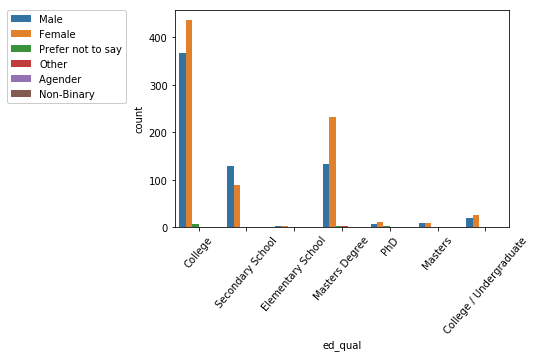

In [13]:
g = sns.countplot(mold_red.ed_qual, hue = "gender", data = mold_red)
for item in g.get_xticklabels():
    item.set_rotation(50)
plt.legend(bbox_to_anchor=(-0.5, 1), loc=2, borderaxespad=0.,framealpha=1, frameon=True)
plt.show()

### Visualization by gender and employ_sector

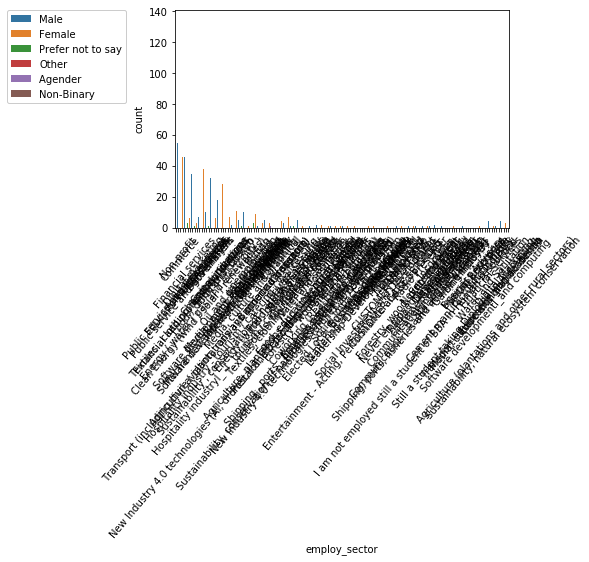

In [14]:
g = sns.countplot(mold_red.employ_sector, hue = "gender", data = mold_red)
for item in g.get_xticklabels():
    item.set_rotation(50)
plt.legend(bbox_to_anchor=(-0.5, 1), loc=2, borderaxespad=0.,framealpha=1, frameon=True)
plt.show()

### Visualization by gender and age category

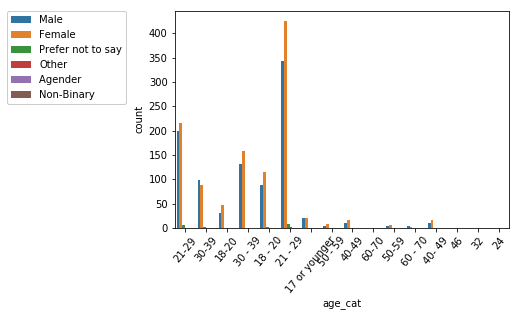

In [15]:
g = sns.countplot(mold_red.age_cat, hue = "gender", data = mold_red)
for item in g.get_xticklabels():
    item.set_rotation(50)
plt.legend(bbox_to_anchor=(-0.5, 1), loc=2, borderaxespad=0.,framealpha=1, frameon=True)
plt.show()

### Visualization by gender and 10-years workshift migration

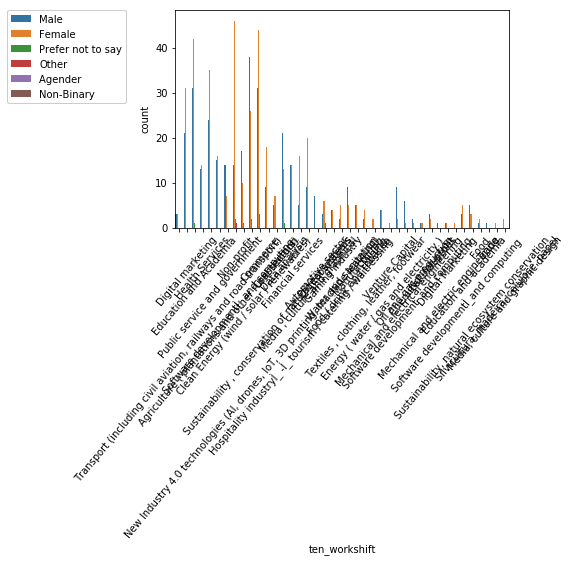

In [16]:
g = sns.countplot(mold_red.ten_workshift, hue = "gender", data = mold_red)
for item in g.get_xticklabels():
    item.set_rotation(50)
plt.legend(bbox_to_anchor=(-0.5, 1), loc=2, borderaxespad=0.,framealpha=1, frameon=True)
plt.show()

### Visualization by work migration in 10-years

No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

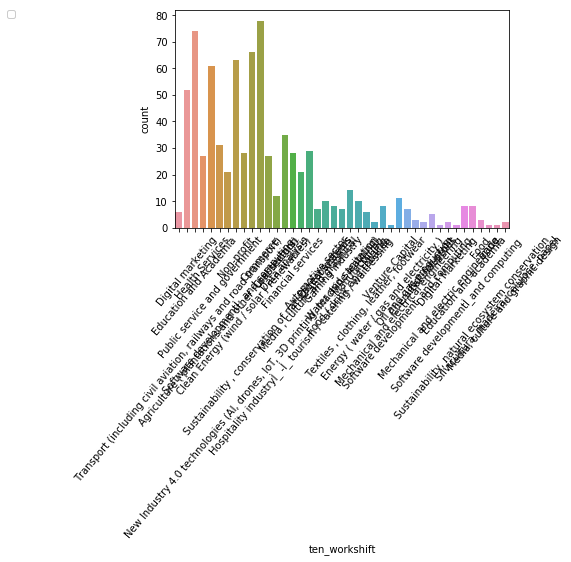

In [17]:
g = sns.countplot(mold_red.ten_workshift)
for item in g.get_xticklabels():
    item.set_rotation(50)
plt.legend(bbox_to_anchor=(-0.5, 1), loc=2, borderaxespad=0.,framealpha=1, frameon=True)
plt.show

### Visualization by gender and quality of education

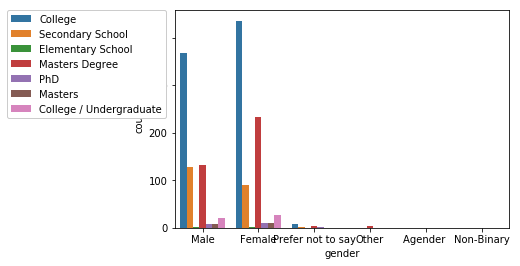

In [18]:
sns.countplot(mold_red.gender, hue = "ed_qual", data = mold_red)
plt.legend(bbox_to_anchor=(-0.5, 1), loc=2, borderaxespad=0.,framealpha=1, frameon=True)

In [19]:
gender_employsector = pd.pivot_table(data = mold_red, columns = "gender", index = "employ_sector", values = "count" , aggfunc= np.sum, fill_value=0 )

In [20]:
employstat_edqual = pd.pivot_table(data = mold_red, columns = "employ_stat", index = "ed_qual", values = "count" , aggfunc= np.sum, fill_value=0 )

In [21]:
gender_employsector[["Female", "Male"]].head()

gender,Female,Male
employ_sector,,
A graduate,2,0
Agriculture ( plantations and other rural sectors),7,21
Agriculture (plantations and other rural sectors),2,1
"Agriculture, plantations and other rural sectors",4,8
Automotive sector,3,14


In [22]:
employ_sector_table = gender_employsector[(gender_employsector>10).values]

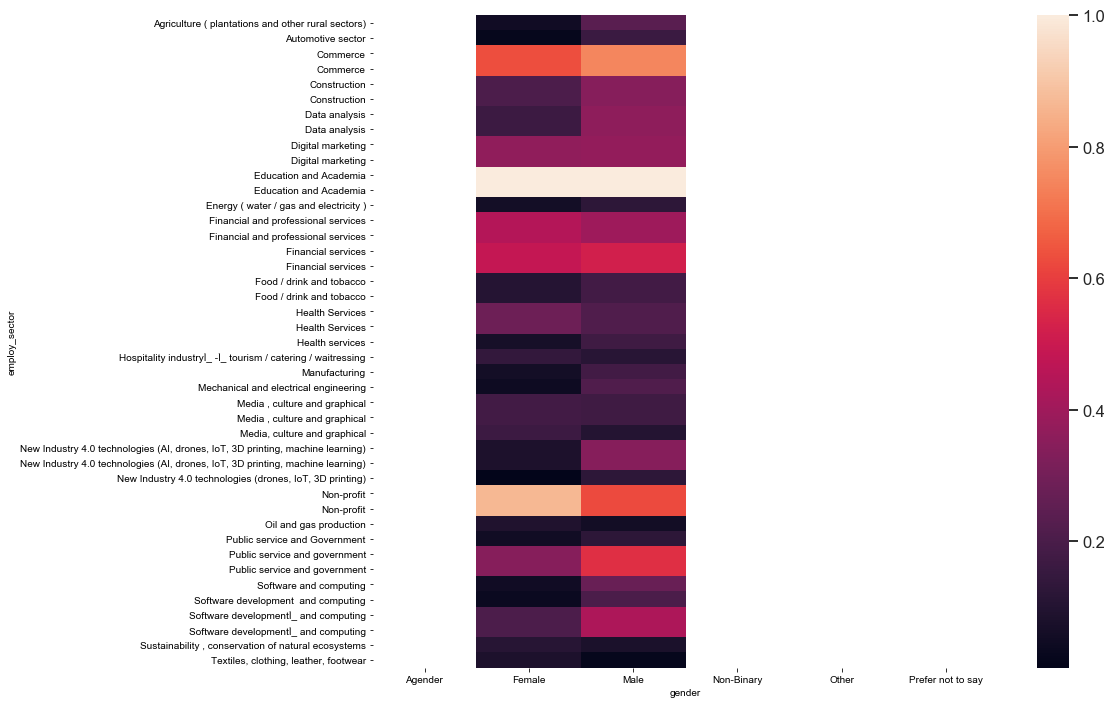

In [23]:
f, axarr = plt.subplots(1,1, squeeze = False)
f.set_size_inches(14,12)
sns.set_style("white")
sns.set_context("talk")
sns.heatmap(employ_sector_table[["Female", "Male"]]/employ_sector_table.max())
plt.show()

In [24]:
employ_male = gender_employsector[["Male"]][(gender_employsector[["Male"]]>10).values]

In [25]:
employ_female = gender_employsector[["Female"]][(gender_employsector[["Female"]]>10).values]

In [26]:
employ_gender_table = pd.concat([employ_male,employ_female], axis = 1). fillna(0)

/home/martin/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [27]:
employ_gender_table.div(employ_gender_table.sum(axis=1), axis=0)

gender,Male,Female
Agriculture ( plantations and other rural sectors),1.000000,0.000000
Automotive sector,1.000000,0.000000
Commerce,0.437086,0.562914
Construction,0.517241,0.482759
Data analysis,0.592593,0.407407
Digital marketing,0.402439,0.597561
Education and Academia,0.396396,0.603604
Energy ( water / gas and electricity ),1.000000,0.000000
Financial and professional services,0.368421,0.631579
Financial services,0.414414,0.585586


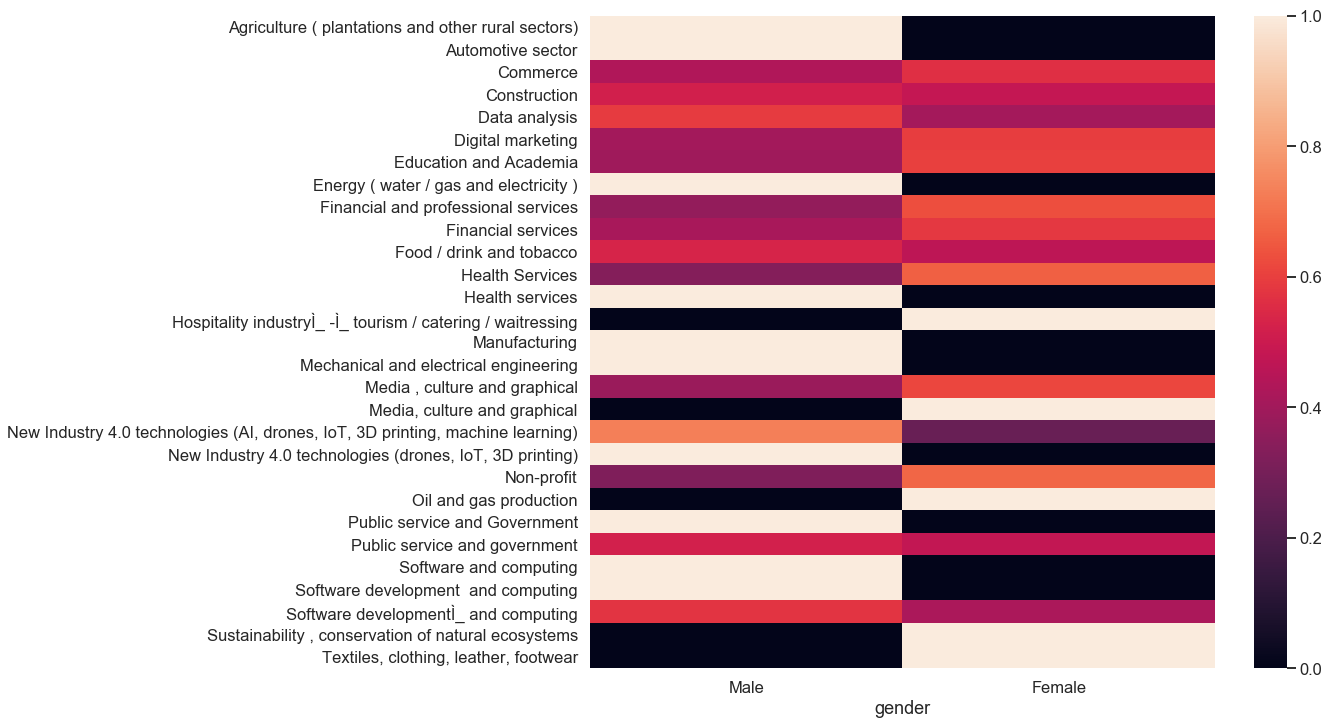

In [28]:
f, axarr = plt.subplots(1,1, squeeze = False)
f.set_size_inches(14,12)
sns.set_style("white")
sns.set_context("talk")
sns.heatmap(employ_gender_table.div(employ_gender_table.sum(axis=1), axis=0))
plt.show()

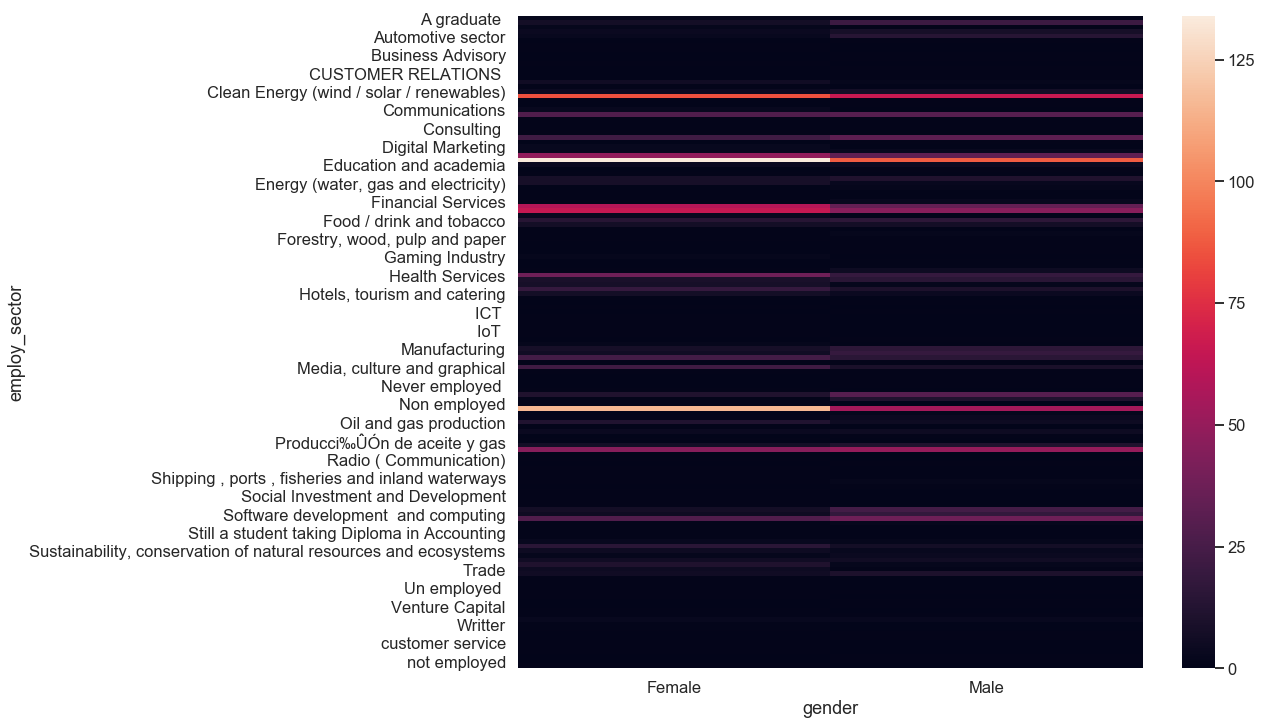

In [29]:
f, axarr = plt.subplots(1,1, squeeze = False)
f.set_size_inches(14,12)
sns.set_style("white")
sns.set_context("talk")
sns.heatmap(gender_employsector[["Female", "Male"]])
plt.show()

# Workshift migration analysis
An origin-destiny matrix is built indicating the actual job of people and the desired one in 10 years.

In [30]:
workshift = pd.pivot_table(data = mold_red, columns = "ten_workshift", index = "employ_sector", values = "count" , aggfunc= np.sum, fill_value=0 )

In [31]:
workshift.sum().sum()

714

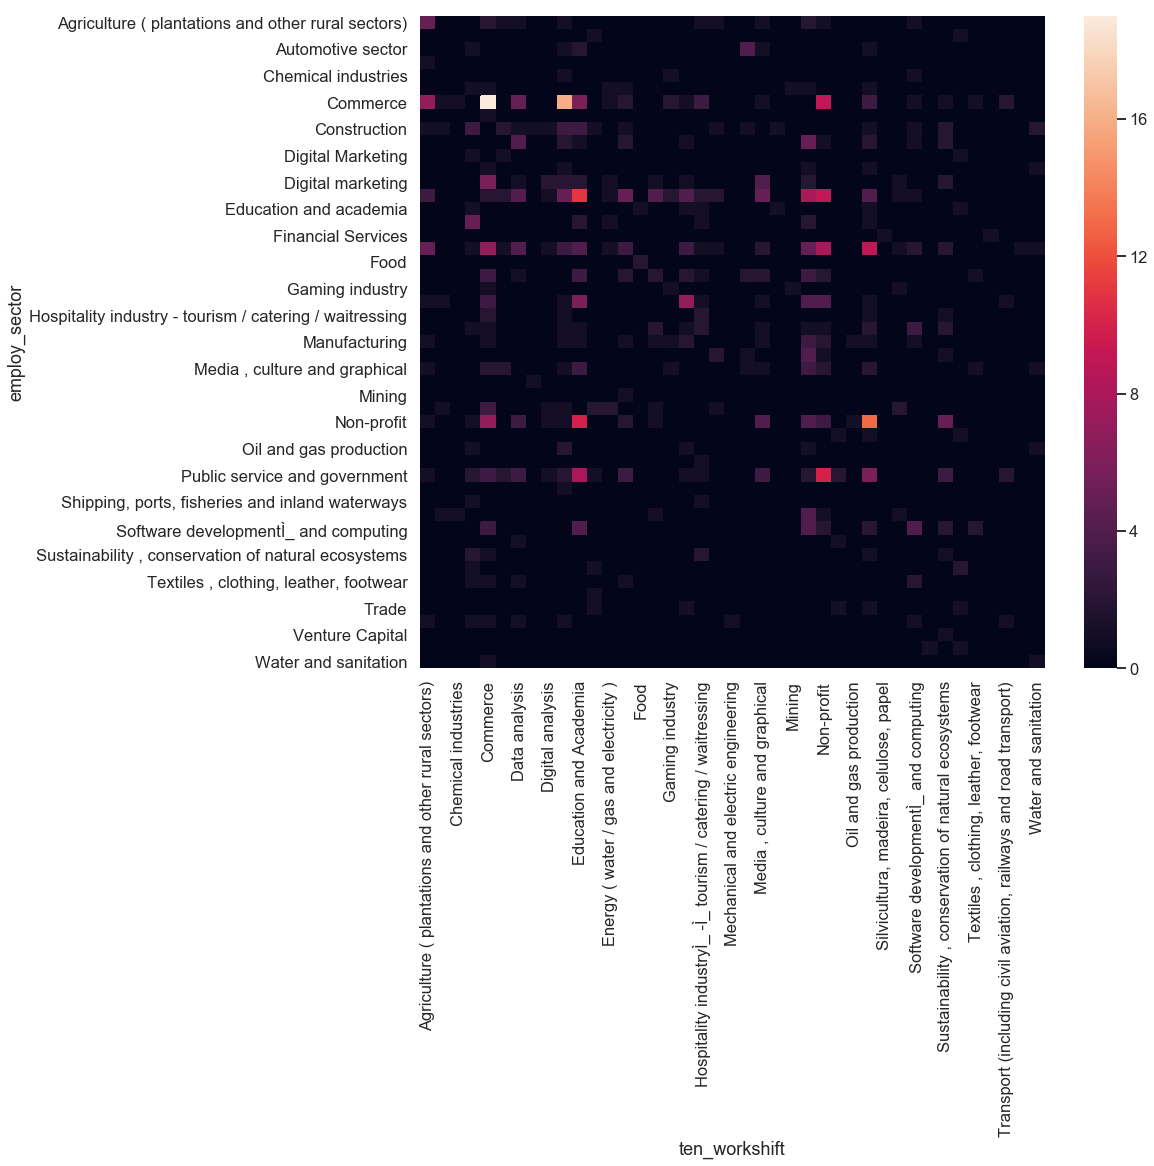

In [32]:
f, axarr = plt.subplots(1,1, squeeze = False)
f.set_size_inches(14,12)
sns.set_style("white")
sns.set_context("talk")
sns.heatmap(workshift)
plt.show()

In [33]:
major_migrators = workshift[workshift.sum(axis = 1)>5].sum(axis = 1)

In [34]:
workshift.loc[(workshift.sum(axis = 0) > 5).values]

ten_workshift,Agriculture ( plantations and other rural sectors),Automotive sector,Chemical industries,Clean Energy (wind / solar / renewables),Commerce,Construction,Data analysis,Digital Marketing,Digital analysis,Digital marketing,...,Software development and computing,Software developmentÌ_ and computing,Software developmentÌ_and computing,"Sustainability , conservation of natural ecosystems","Sustainability, natural ecosystem conservation","Textiles , clothing, leather, footwear",Trade,"Transport (including civil aviation, railways and road transport)",Venture Capital,Water and sanitation
employ_sector,,,,,,,,,,,,,,,,,,,,,
Agriculture ( plantations and other rural sectors),5,0,0,0,2,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
Basic metal production,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Chemical industries,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
Clean Energy (wind / solar / renewables),0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Commerce,7,1,1,0,19,0,5,0,0,16,...,0,1,0,1,0,1,0,2,0,0
Construction,1,1,0,3,0,2,1,1,1,3,...,0,1,0,2,0,0,0,0,0,2
Data analysis,0,0,0,0,0,0,4,0,0,2,...,0,1,0,2,0,0,0,0,0,0
Digital Marketing,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Digital analysis,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [35]:
#major_receivers = workshift[workshift.sum(axis = 0)>5].sum(axis = 0)
receivers = workshift.sum(axis = 0)
receivers[(receivers>5).values]

ten_workshift
Agriculture ( plantations and other rural sectors)                                28
Clean Energy (wind / solar / renewables)                                          24
Commerce                                                                          72
Construction                                                                      11
Data analysis                                                                     30
Digital analysis                                                                   8
Digital marketing                                                                 48
Education and Academia                                                            67
Education and academia                                                             8
Energy ( water / gas and electricity )                                             8
Financial services                                                                24
Food / drink and tobacco                           

No handles with labels found to put in legend.


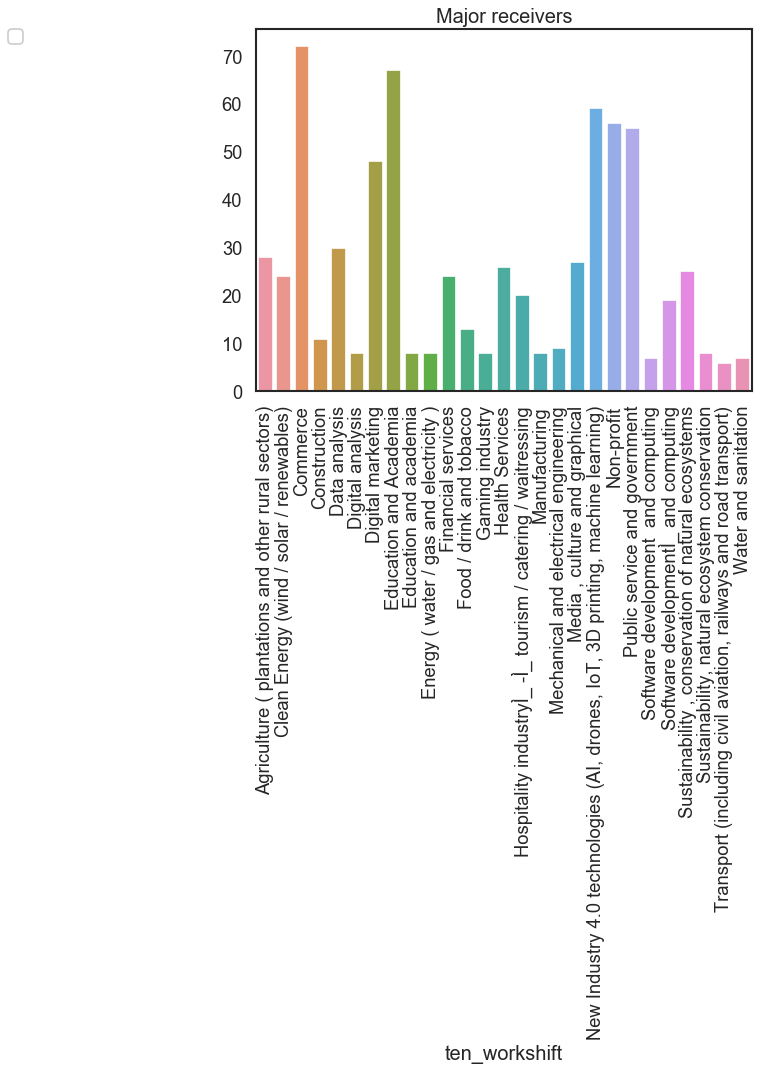

In [36]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
g = sns.barplot(x = receivers[(receivers>5).values].index, y = receivers[(receivers>5).values])
for item in g.get_xticklabels():
    item.set_rotation(90)
plt.legend(bbox_to_anchor=(-0.5, 1), loc=2, borderaxespad=0.,framealpha=1, frameon=True)
plt.title("Major receivers")
plt.show()

In [37]:
#major_receivers = workshift[workshift.sum(axis = 0)>5].sum(axis = 0)
migrators = workshift.sum(axis = 1)
migrators[(migrators>5).values]

employ_sector
Agriculture ( plantations and other rural sectors)                                17
Automotive sector                                                                 10
Clean Energy (wind / solar / renewables)                                           7
Commerce                                                                          82
Construction                                                                      27
Data analysis                                                                     21
Digital marketing                                                                 25
Education and Academia                                                            76
Education and academia                                                             7
Energy ( water / gas and electricity )                                            12
Financial services                                                                66
Food / drink and tobacco                           

No handles with labels found to put in legend.


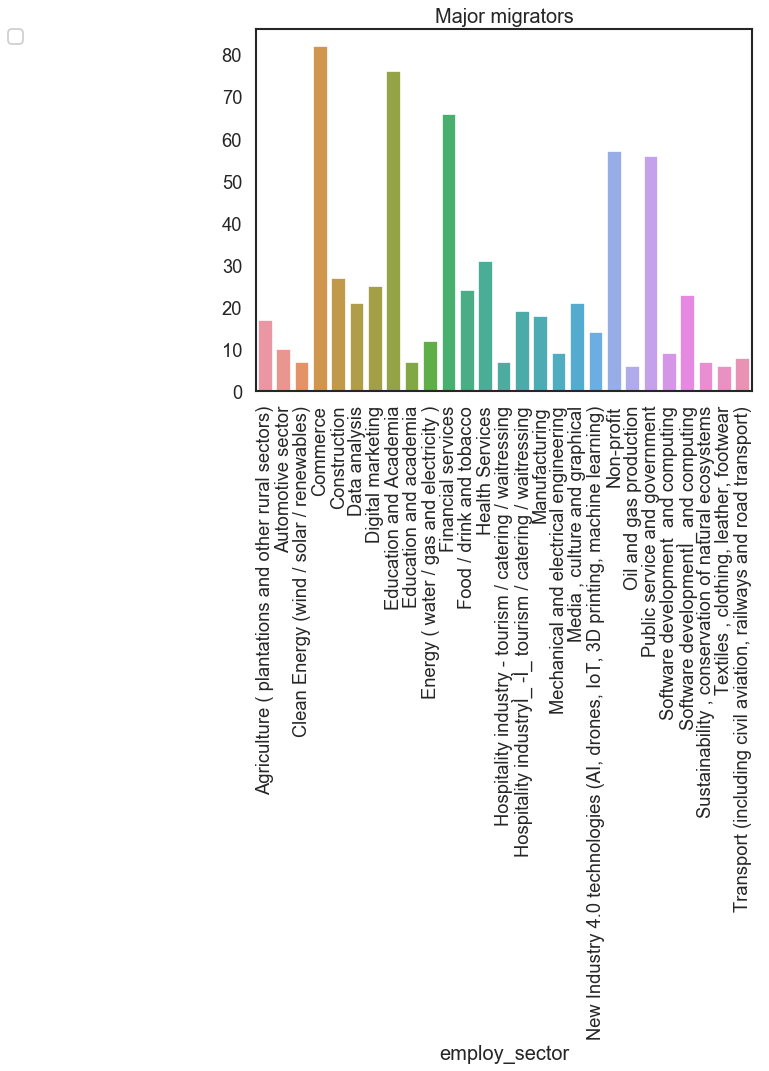

In [38]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
g = sns.barplot(x = migrators[(migrators>5).values].index, y = migrators[(migrators>5).values])
for item in g.get_xticklabels():
    item.set_rotation(90)
plt.legend(bbox_to_anchor=(-0.5, 1), loc=2, borderaxespad=0.,framealpha=1, frameon=True)
plt.title("Major migrators")
plt.show()

In [39]:
workshift.shape

(49, 41)

In [40]:
major_workshift = workshift.loc[workshift.sum(axis = 1)>5,workshift.sum(axis = 0)>5]

In [41]:
major_workshift.div(major_workshift.sum(axis=1), axis=0)

ten_workshift,Agriculture ( plantations and other rural sectors),Clean Energy (wind / solar / renewables),Commerce,Construction,Data analysis,Digital analysis,Digital marketing,Education and Academia,Education and academia,Energy ( water / gas and electricity ),...,"Media , culture and graphical","New Industry 4.0 technologies (AI, drones, IoT, 3D printing, machine learning)",Non-profit,Public service and government,Software development and computing,Software developmentÌ_ and computing,"Sustainability , conservation of natural ecosystems","Sustainability, natural ecosystem conservation","Transport (including civil aviation, railways and road transport)",Water and sanitation
employ_sector,,,,,,,,,,,,,,,,,,,,,
Agriculture ( plantations and other rural sectors),0.294118,0.000000,0.117647,0.058824,0.058824,0.000000,0.058824,0.000000,0.000000,0.000000,...,0.058824,0.117647,0.058824,0.000000,0.000000,0.058824,0.000000,0.0,0.000000,0.000000
Automotive sector,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.100000,0.200000,0.000000,0.000000,...,0.100000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
Clean Energy (wind / solar / renewables),0.000000,0.166667,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,...,0.000000,0.166667,0.000000,0.166667,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
Commerce,0.088608,0.000000,0.240506,0.000000,0.063291,0.000000,0.202532,0.075949,0.000000,0.012658,...,0.012658,0.000000,0.113924,0.037975,0.000000,0.012658,0.012658,0.0,0.025316,0.000000
Construction,0.041667,0.125000,0.000000,0.083333,0.041667,0.041667,0.125000,0.125000,0.041667,0.000000,...,0.000000,0.000000,0.000000,0.041667,0.000000,0.041667,0.083333,0.0,0.000000,0.083333
Data analysis,0.000000,0.000000,0.000000,0.000000,0.190476,0.000000,0.095238,0.047619,0.000000,0.000000,...,0.000000,0.238095,0.047619,0.095238,0.000000,0.047619,0.095238,0.0,0.000000,0.000000
Digital marketing,0.000000,0.000000,0.240000,0.000000,0.040000,0.080000,0.080000,0.080000,0.000000,0.040000,...,0.160000,0.080000,0.000000,0.000000,0.040000,0.000000,0.080000,0.0,0.000000,0.000000
Education and Academia,0.039474,0.000000,0.026316,0.026316,0.052632,0.013158,0.065789,0.144737,0.000000,0.013158,...,0.065789,0.105263,0.118421,0.052632,0.013158,0.013158,0.000000,0.0,0.000000,0.000000
Education and academia,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.2,0.000000,0.000000


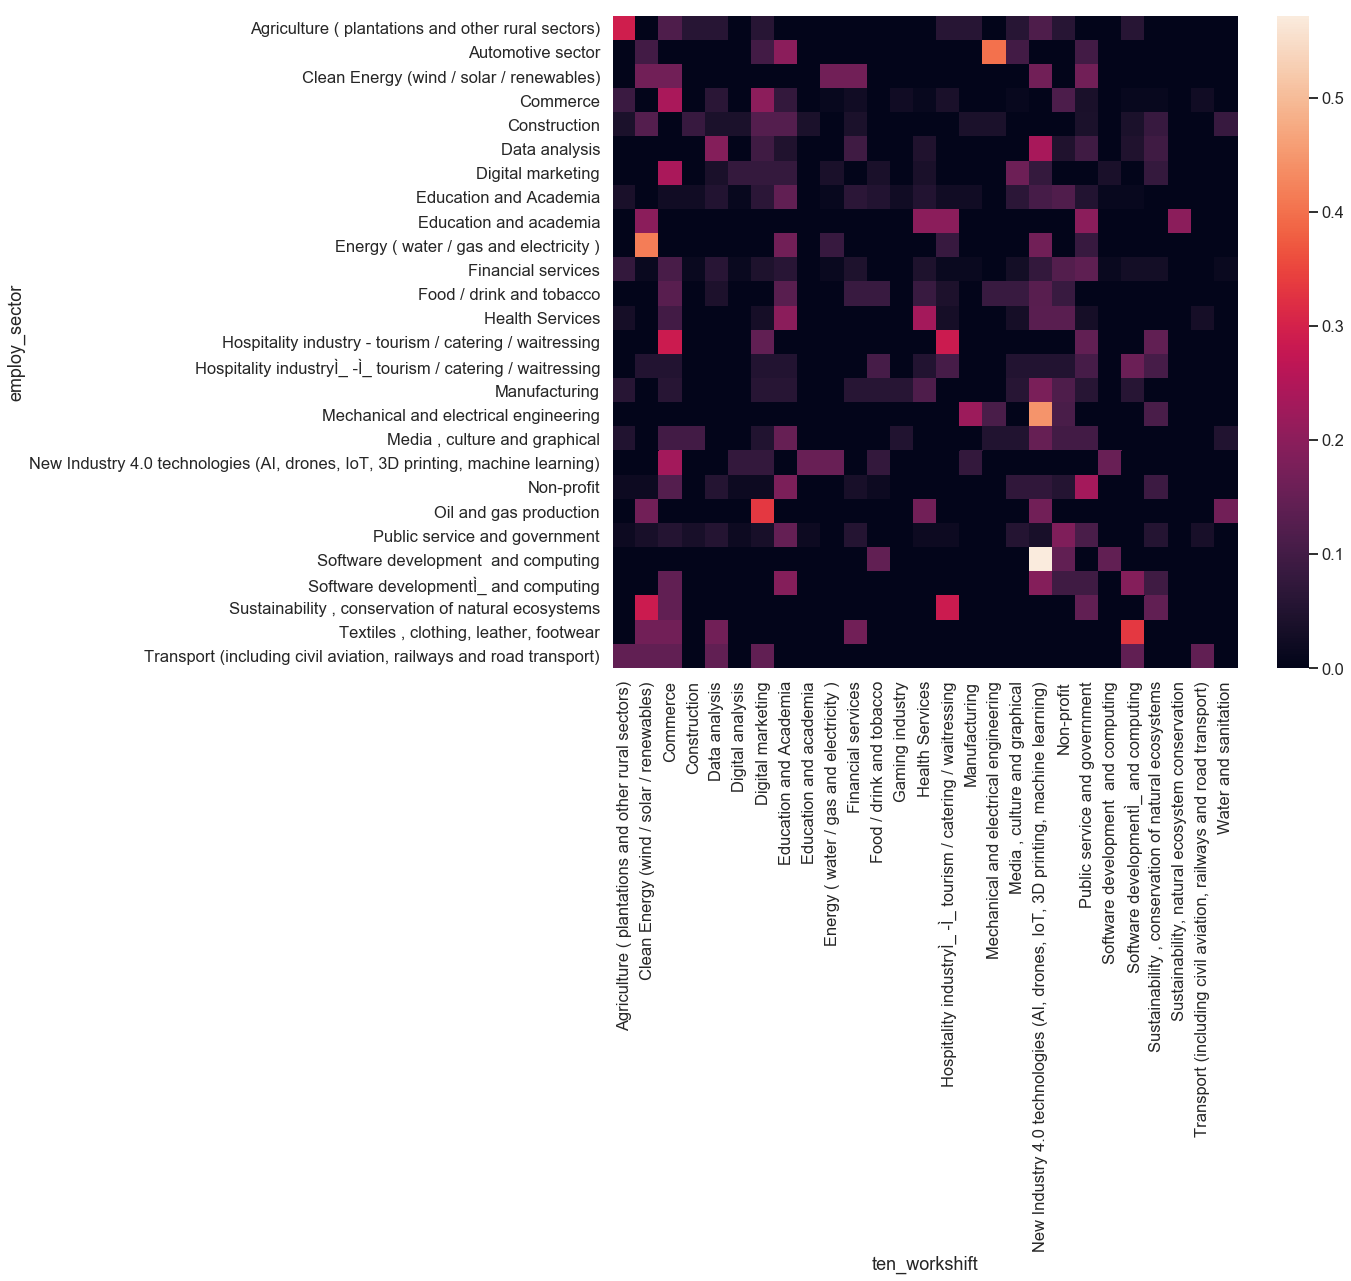

In [42]:
f, axarr = plt.subplots(1,1, squeeze = False)
f.set_size_inches(14,12)
sns.set_style("white")
sns.set_context("talk")
sns.heatmap(major_workshift.div(major_workshift.sum(axis=1), axis=0))
plt.show()

In [44]:
#g = sns.barplot(x = major_workshift.index, y = major_workshift)
#for item in g.get_xticklabels():
#    item.set_rotation(70)
#plt.show()

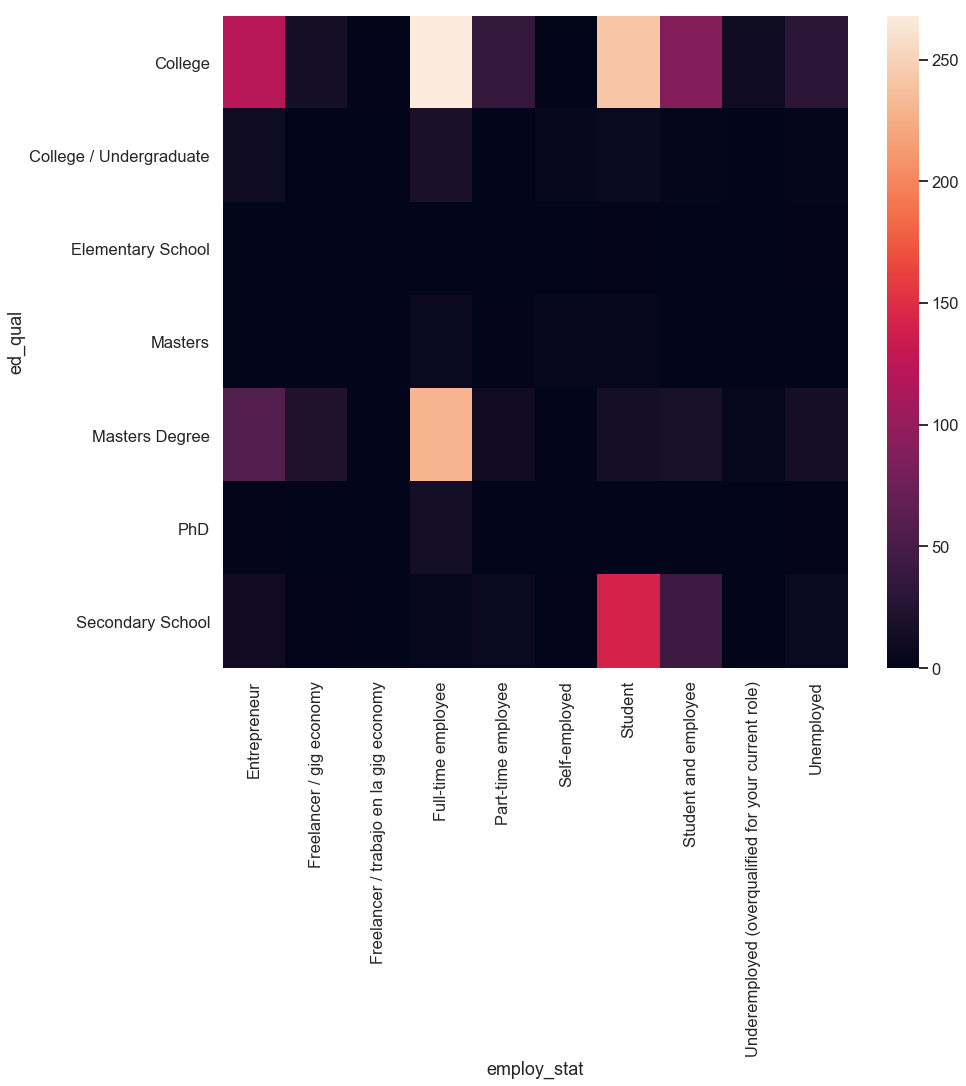

In [52]:
f, axarr = plt.subplots(1,1, squeeze = False)
f.set_size_inches(14,12)
sns.set_style("white")
sns.set_context("talk")
sns.heatmap(employstat_edqual)
plt.show()

# Spectral clustering

In [47]:
from sklearn.cluster import SpectralClustering

In [53]:
sc = SpectralClustering(2, affinity='precomputed', n_init=100)
sc.fit(major_workshift)

/home/martin/anaconda3/envs/keras/lib/python3.6/site-packages/sklearn/utils/validation.py:892: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  warnings.warn("Array is not symmetric, and will be converted "


SpectralClustering(affinity='precomputed', assign_labels='kmeans', coef0=1,
          degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
          kernel_params=None, n_clusters=2, n_init=100, n_jobs=None,
          n_neighbors=10, random_state=None)

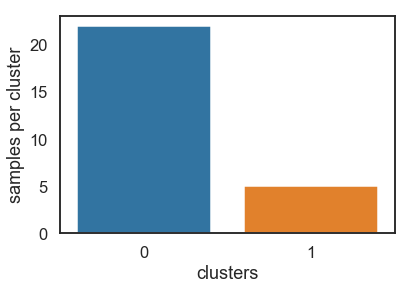

In [54]:
sns.countplot(sc.labels_)
plt.xlabel("clusters")
plt.ylabel("samples per cluster")
plt.show()

In [55]:
from numpy import linalg as LA
w, v = LA.eig(major_workshift)

/home/martin/anaconda3/envs/keras/lib/python3.6/site-packages/numpy/core/numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


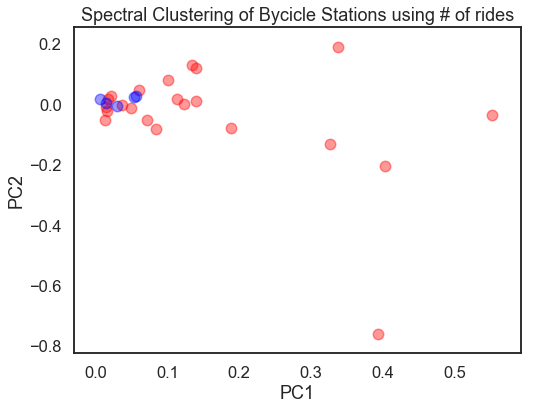

In [56]:
sns.set_context("talk")
plt.figure(figsize=(8,6))
plt.scatter(np.ravel(v[sc.labels_==0,0]),np.ravel(v[sc.labels_==0,1]), c = 'r', alpha = 0.4, s = 110)
plt.scatter(np.ravel(v[sc.labels_==1,0]),np.ravel(v[sc.labels_==1,1]), c = 'b', alpha = 0.4, s = 110)
#plt.scatter(np.ravel(v[sc.labels_==2,0]),np.ravel(v[sc.labels_==2,1]), c = 'g', alpha = 0.4, s = 110)
#plt.scatter(np.ravel(v[sc.labels_==3,0]),np.ravel(v[sc.labels_==3,1]), c = 'y', alpha = 0.4, s = 80)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Spectral Clustering of Bycicle Stations using # of rides")
plt.grid(False)
plt.show()